In [1]:
import pandas as pd

# Load the dataset from the provided Excel file
file_path = 'all_datasets.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset and the columns to understand its structure
data.head(), data.columns


(   websource search_job                                              title  \
 0  Stepstone         DE    Data Engineer / Data Governance Manager (w/m/d)   
 1  Stepstone         DE                       Data DEVOPS Engineer (f/m/x)   
 2  Stepstone         DE  Full stack Data Engineer (w/m/d) für ein KI-Pr...   
 3  Stepstone         DE  Data Engineer für Ökobilanzdatenbank - Schwerp...   
 4  Stepstone         DE              Data Engineer/Systemingenieur (m/w/d)   
 
                                 company  \
 0  Noerr Partnerschaftsgesellschaft mbB   
 1                                 ZEISS   
 2       Universitätsklinikum Köln (AöR)   
 3                     Carbon Minds GmbH   
 4           BITMARCK-Unternehmensgruppe   
 
                                             location  \
 0  Berlin, Dresden, Düsseldorf, Frankfurt, Hambur...   
 1                                            München   
 2                                               Köln   
 3                            

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Function to identify German language requirement
def detect_german_requirement(text):
    # Defining keywords that might indicate the need for German language skills
    german_keywords = ['german', 'deutsch', 'deutsche Sprache', 'deutschsprachig', 'deutschkenntnisse']
    for keyword in german_keywords:
        if keyword in text.lower():
            return True
    return False

# Apply the function to the job_description and requirements columns
data['requires_german'] = data['job_description'].fillna('') + data['requirements'].fillna('')
data['requires_german'] = data['requires_german'].apply(detect_german_requirement)

# Count the number of job postings requiring German
german_required_count = data['requires_german'].sum()

# Example rows where German is required
example_rows_german_required = data[data['requires_german']].head()

german_required_count, example_rows_german_required[['title', 'job_description', 'requirements']]


(596,
                                                title  \
 2  Full stack Data Engineer (w/m/d) für ein KI-Pr...   
 3  Data Engineer für Ökobilanzdatenbank - Schwerp...   
 4              Data Engineer/Systemingenieur (m/w/d)   
 5  Data Engineer / Business Intelligence Develope...   
 8                              Data Engineer (m/w/d)   
 
                                      job_description  \
 2  Ihre Aufgaben \n \n Sie arbeiten als Data Engi...   
 3  Deine Aufgaben\n\tTechnische Verantwortung für...   
 4  Deine Projekte – das machst du bei uns: \n Ent...   
 5  Ihre Aufgaben\nKonzeption, Modellierung und Re...   
 8  Deine Aufgaben\n\tDu bist für die Gestaltung u...   
 
                                         requirements  
 2  Ihr Profil \n \n Erfolgreiches Studium der Inf...  
 3  Dein Profil\n\tAbgeschlossenes MINT-Studium mi...  
 4  Dein Backend – das bringst du mit: \n Mehrjähr...  
 5  Ihr Profil\nAbgeschlossenes Studium der BWL, d...  
 8  Dein Profil\n\tDu hast

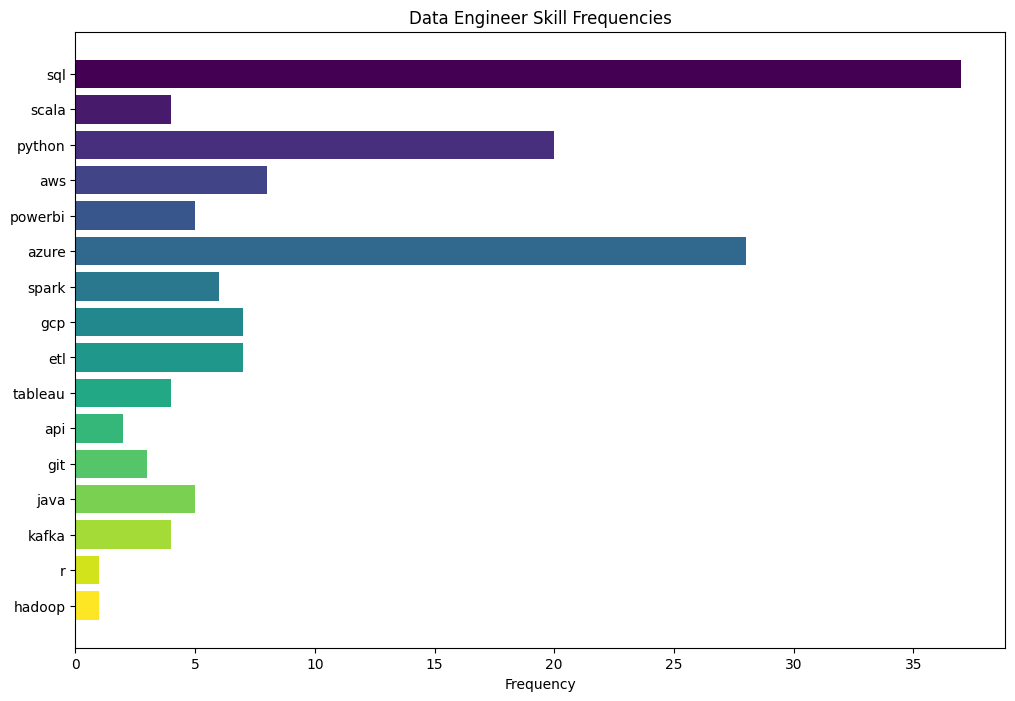

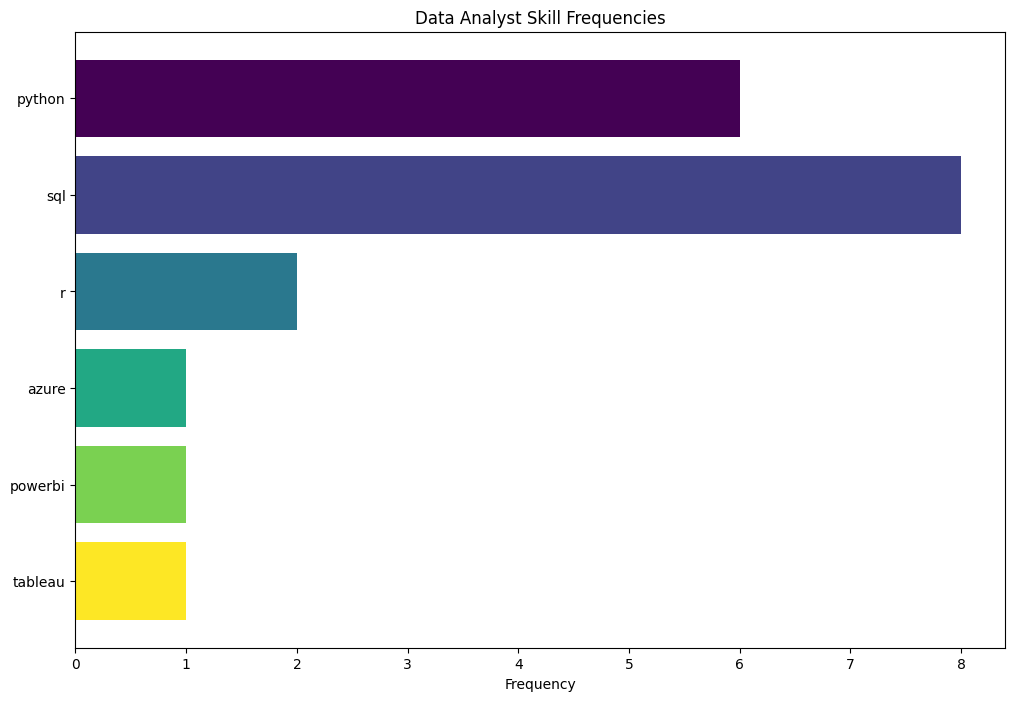

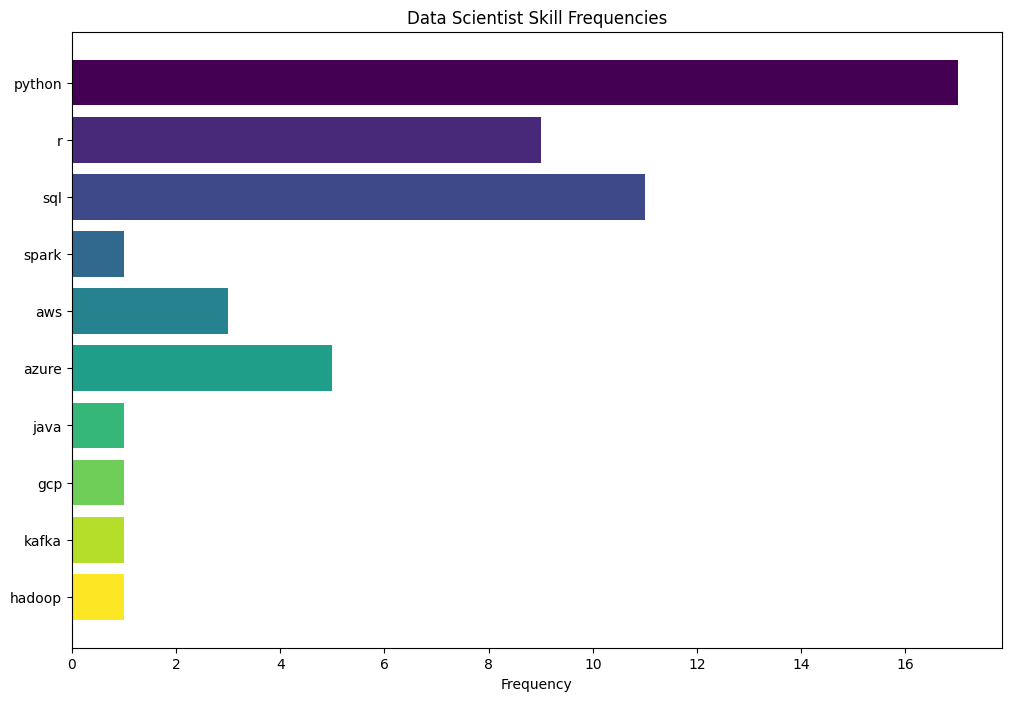

In [5]:
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported
from collections import Counter

# Filtering the dataset by position with robust handling for NaN in 'title'
data['title'] = data['title'].fillna('')  # Fill NaN with empty strings to avoid errors in str.contains
data_engineer_jobs = data[data['title'].str.contains("Data Engineer", case=False)]
data_analyst_jobs = data[data['title'].str.contains("Data Analyst", case=False)]
data_scientist_jobs = data[data['title'].str.contains("Data Scientist", case=False)]

# Function to extract skills from text
def extract_skills(text):
    words = text.lower().split()
    technical_skills = ['python', 'r', 'sql', 'java', 'scala', 'hadoop', 'spark', 'kafka', 'tableau', 'powerbi',
                        'aws', 'azure', 'gcp', 'machine learning', 'deep learning', 'data mining', 'etl', 'api', 'git']
    return [skill for skill in technical_skills if skill in words]

# Apply function and count skills
data_engineer_skills = data_engineer_jobs['requirements'].fillna('').apply(extract_skills).sum()
data_analyst_skills = data_analyst_jobs['requirements'].fillna('').apply(extract_skills).sum()
data_scientist_skills = data_scientist_jobs['requirements'].fillna('').apply(extract_skills).sum()

data_engineer_skill_counts = Counter(data_engineer_skills)
data_analyst_skill_counts = Counter(data_analyst_skills)
data_scientist_skill_counts = Counter(data_scientist_skills)

# Function to plot skill frequencies with colorful bars
def plot_skill_frequencies_colorful(skill_counts, title):
    if skill_counts:  # Check if skill_counts is not empty
        skills = list(skill_counts.keys())
        counts = list(skill_counts.values())
        colors = plt.cm.viridis(np.linspace(0, 1, len(skills)))  # Color map
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.barh(skills, counts, color=colors)
        ax.set_xlabel('Frequency')
        ax.set_title(title)
        ax.invert_yaxis()  # Highest frequencies at the top
        plt.show()
    else:
        print(f"No data to plot for {title}")

# Plotting skill frequencies for each role
plot_skill_frequencies_colorful(data_engineer_skill_counts, 'Data Engineer Skill Frequencies')
plot_skill_frequencies_colorful(data_analyst_skill_counts, 'Data Analyst Skill Frequencies')
plot_skill_frequencies_colorful(data_scientist_skill_counts, 'Data Scientist Skill Frequencies')


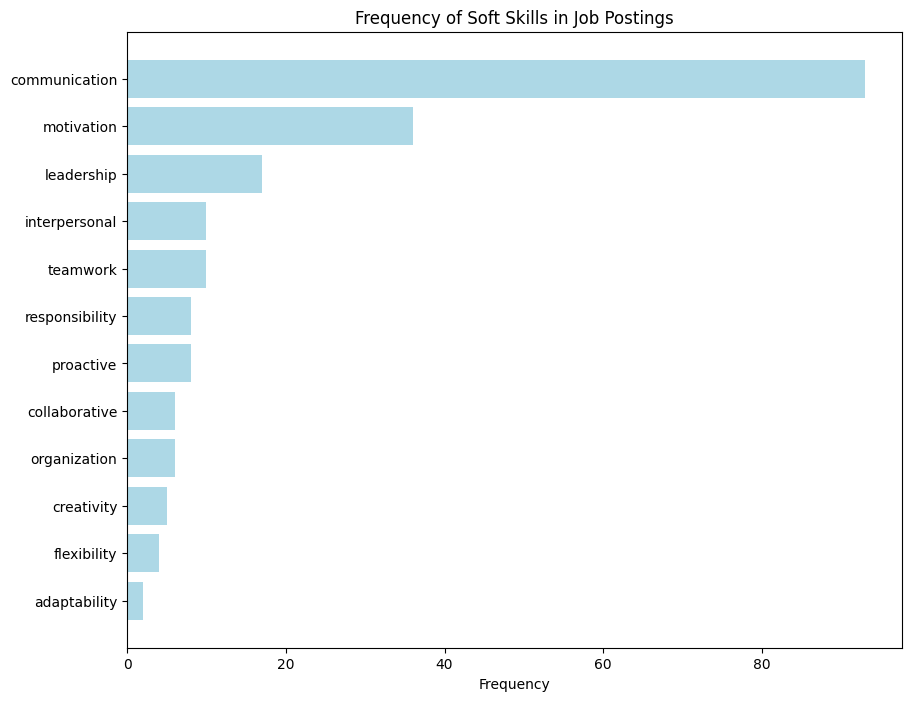

In [6]:
soft_skills = [
    'communication', 'teamwork', 'leadership', 'creativity', 'adaptability',
    'problem-solving', 'time management', 'critical thinking', 'interpersonal',
    'organization', 'empathy', 'customer service', 'conflict resolution',
    'decision making', 'work ethic', 'responsibility', 'motivation', 'flexibility',
    'attention to detail', 'self-starter', 'proactive', 'collaborative'
]

def extract_skills(text, skill_set):
    words = text.lower().replace('-', ' ').split()  # Replace dashes for better matching
    skills_found = [skill for skill in skill_set if skill in words]
    return skills_found

# Example soft skills set
soft_skills_set = set(soft_skills)

# Extract soft skills from the job data
data['soft_skills'] = data['requirements'].fillna('').apply(lambda x: extract_skills(x, soft_skills_set))
soft_skill_counts = Counter([skill for sublist in data['soft_skills'] for skill in sublist])

# Plotting results
def plot_soft_skills(skill_counts):
    skills, counts = zip(*skill_counts.most_common(20))
    plt.figure(figsize=(10, 8))
    plt.barh(skills, counts, color='lightblue')
    plt.xlabel('Frequency')
    plt.title('Frequency of Soft Skills in Job Postings')
    plt.gca().invert_yaxis()
    plt.show()

plot_soft_skills(soft_skill_counts)


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iPakin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load stopwords for English and German
stopwords_set = set(stopwords.words('english')).union(set(stopwords.words('german')))

def preprocess_text_nltk(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stopwords_set]
    # Simplified stemming process
    stemmed_tokens = [token[:5] for token in filtered_tokens]
    return stemmed_tokens

# Applying the NLTK preprocessing
processed_job_descriptions_nltk = data['job_description'].fillna('').apply(preprocess_text_nltk).sum()
processed_requirements_nltk = data['requirements'].fillna('').apply(preprocess_text_nltk).sum()

# Count frequencies
job_desc_counts_nltk = Counter(processed_job_descriptions_nltk)
requirements_counts_nltk = Counter(processed_requirements_nltk)

# Top 10 frequent words
top_words_job_desc_nltk = job_desc_counts_nltk.most_common(10)
top_words_requirements_nltk = requirements_counts_nltk.most_common(10)

top_words_job_desc_nltk, top_words_requirements_nltk


([('data', 1025),
  ('daten', 848),
  ('entwi', 807),
  ('techn', 801),
  ('analy', 735),
  ('aufga', 677),
  ('produ', 666),
  ('unter', 661),
  ('proje', 646),
  ('team', 562)],
 [('exper', 985),
  ('erfah', 910),
  ('data', 790),
  ('kennt', 699),
  ('berei', 674),
  ('profi', 670),
  ('gute', 641),
  ('sowie', 593),
  ('techn', 586),
  ('engli', 581)])

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

# Combining and cleaning the text data
combined_job_descriptions = [" ".join(doc) for doc in data['job_description'].fillna('').apply(preprocess_text_nltk)]
combined_requirements = [" ".join(doc) for doc in data['requirements'].fillna('').apply(preprocess_text_nltk)]

# Vectorizing the text data for NMF and LDA
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)

# Transform data using TF-IDF for NMF
tfidf_job_descriptions = tfidf_vectorizer.fit_transform(combined_job_descriptions)
tfidf_requirements = tfidf_vectorizer.fit_transform(combined_requirements)

# Transform data using CountVectorizer for LDA
tf_job_descriptions = tf_vectorizer.fit_transform(combined_job_descriptions)
tf_requirements = tf_vectorizer.fit_transform(combined_requirements)

# Number of topics
n_topics = 5

# Apply NMF
nmf_model_job_desc = NMF(n_components=n_topics, random_state=1).fit(tfidf_job_descriptions)
nmf_model_requirements = NMF(n_components=n_topics, random_state=1).fit(tfidf_requirements)

# Apply LDA
lda_model_job_desc = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', random_state=0).fit(tf_job_descriptions)
lda_model_requirements = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', random_state=0).fit(tf_requirements)

# Function to display topics from the models
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the topics from NMF and LDA for job descriptions
print("NMF Topics for Job Descriptions:")
display_topics(nmf_model_job_desc, tfidf_vectorizer.get_feature_names_out(), 10)

print("\nLDA Topics for Job Descriptions:")
display_topics(lda_model_job_desc, tf_vectorizer.get_feature_names_out(), 10)

# Display the topics from NMF and LDA for requirements
print("\nNMF Topics for Requirements:")
display_topics(nmf_model_requirements, tfidf_vectorizer.get_feature_names_out(), 10)

print("\nLDA Topics for Requirements:")
display_topics(lda_model_requirements, tf_vectorizer.get_feature_names_out(), 10)


NMF Topics for Job Descriptions:
Topic 0:
lates verbi proac exper art previ ansib techn ausbi java
Topic 1:
deplo diszi certi prefe max previ ansib solve teamo synap
Topic 2:
desir deplo ansib exper optio zusät art verbi ausbi inclu
Topic 3:
solut inclu exper art diszi aktue disab teamo itil tag
Topic 4:
bioin bache ausbi souve withi tag situa verbe comme exper

LDA Topics for Job Descriptions:
Topic 0:
desir verbi fehle ansib ausbi souve proac einfa anwen java
Topic 1:
deplo certi diszi solve teamo ansib prefe max opera red
Topic 2:
exper desir ausbi verbi art techn deplo withi verbe lates
Topic 3:
ansib mecha deplo recor struk image defin disab drive diszi
Topic 4:
diszi previ techn max synap prefe disab solut teamo essen

NMF Topics for Requirements:
Topic 0:
kennt gute erfah berei vergl abges studi profi infor engli
Topic 1:
exper skill knowl degre devel profi techn commu manag quali
Topic 2:
data daten sql analy scien pytho stati exper wareh azure
Topic 3:
sowie arbei kommu fähig 

Word Clouds for NMF Topics in Job Descriptions:


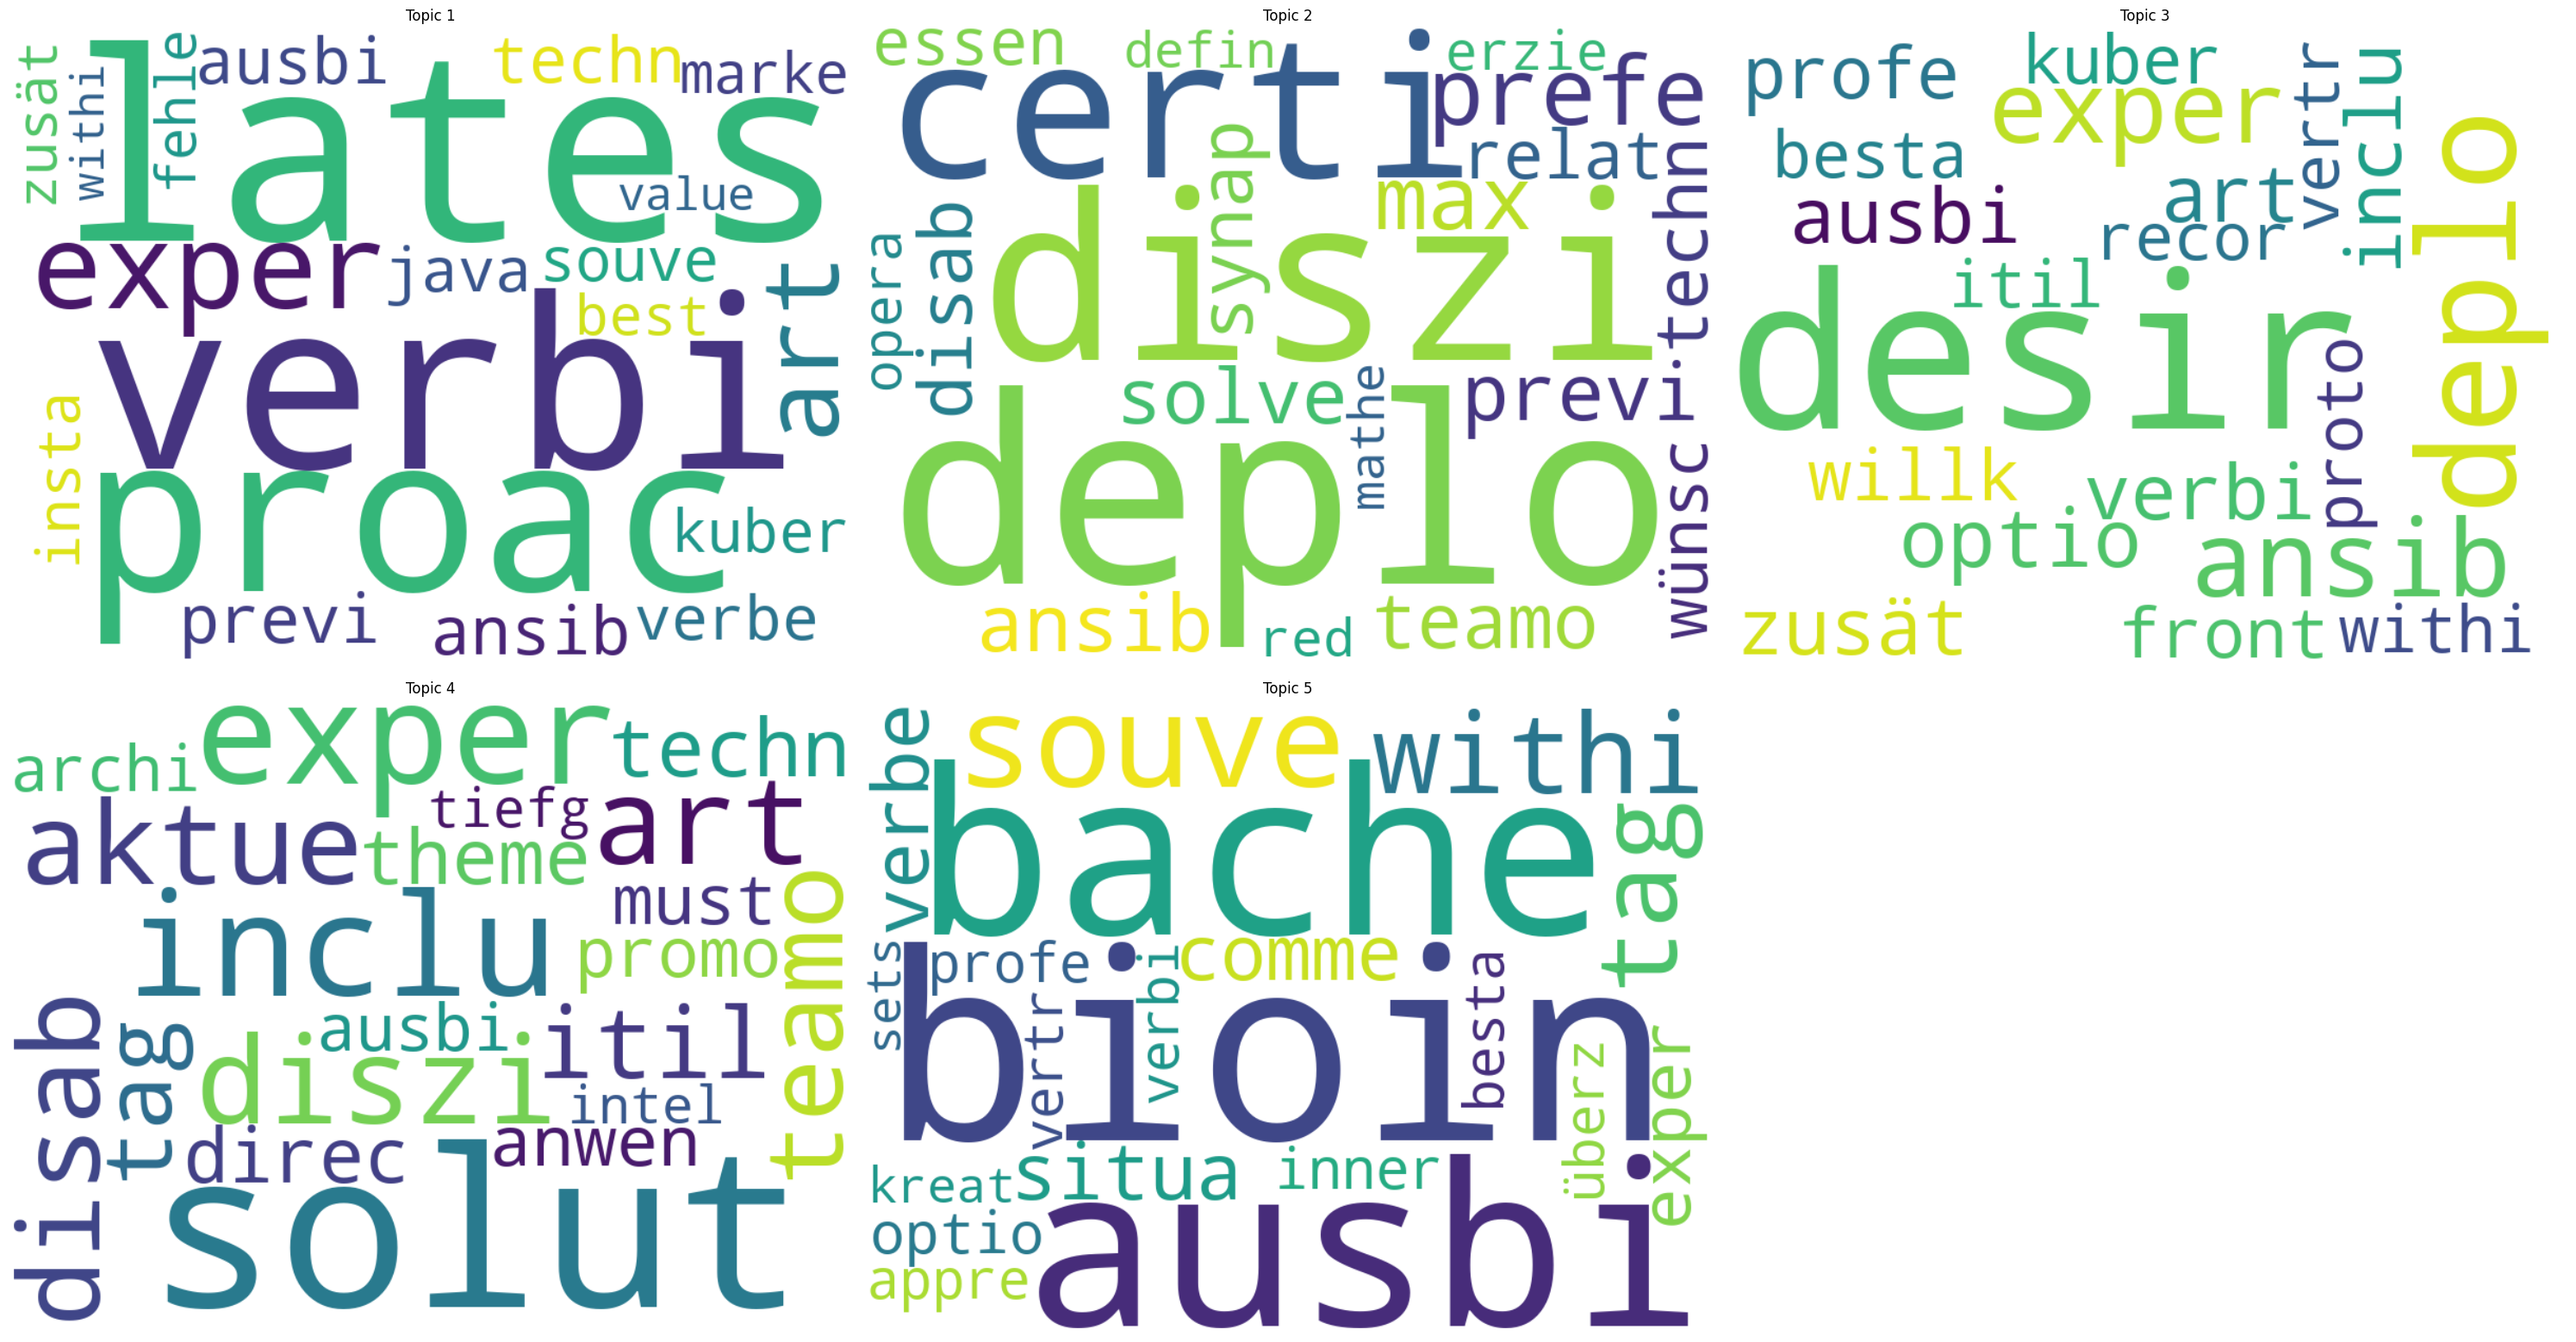

Word Clouds for LDA Topics in Job Descriptions:


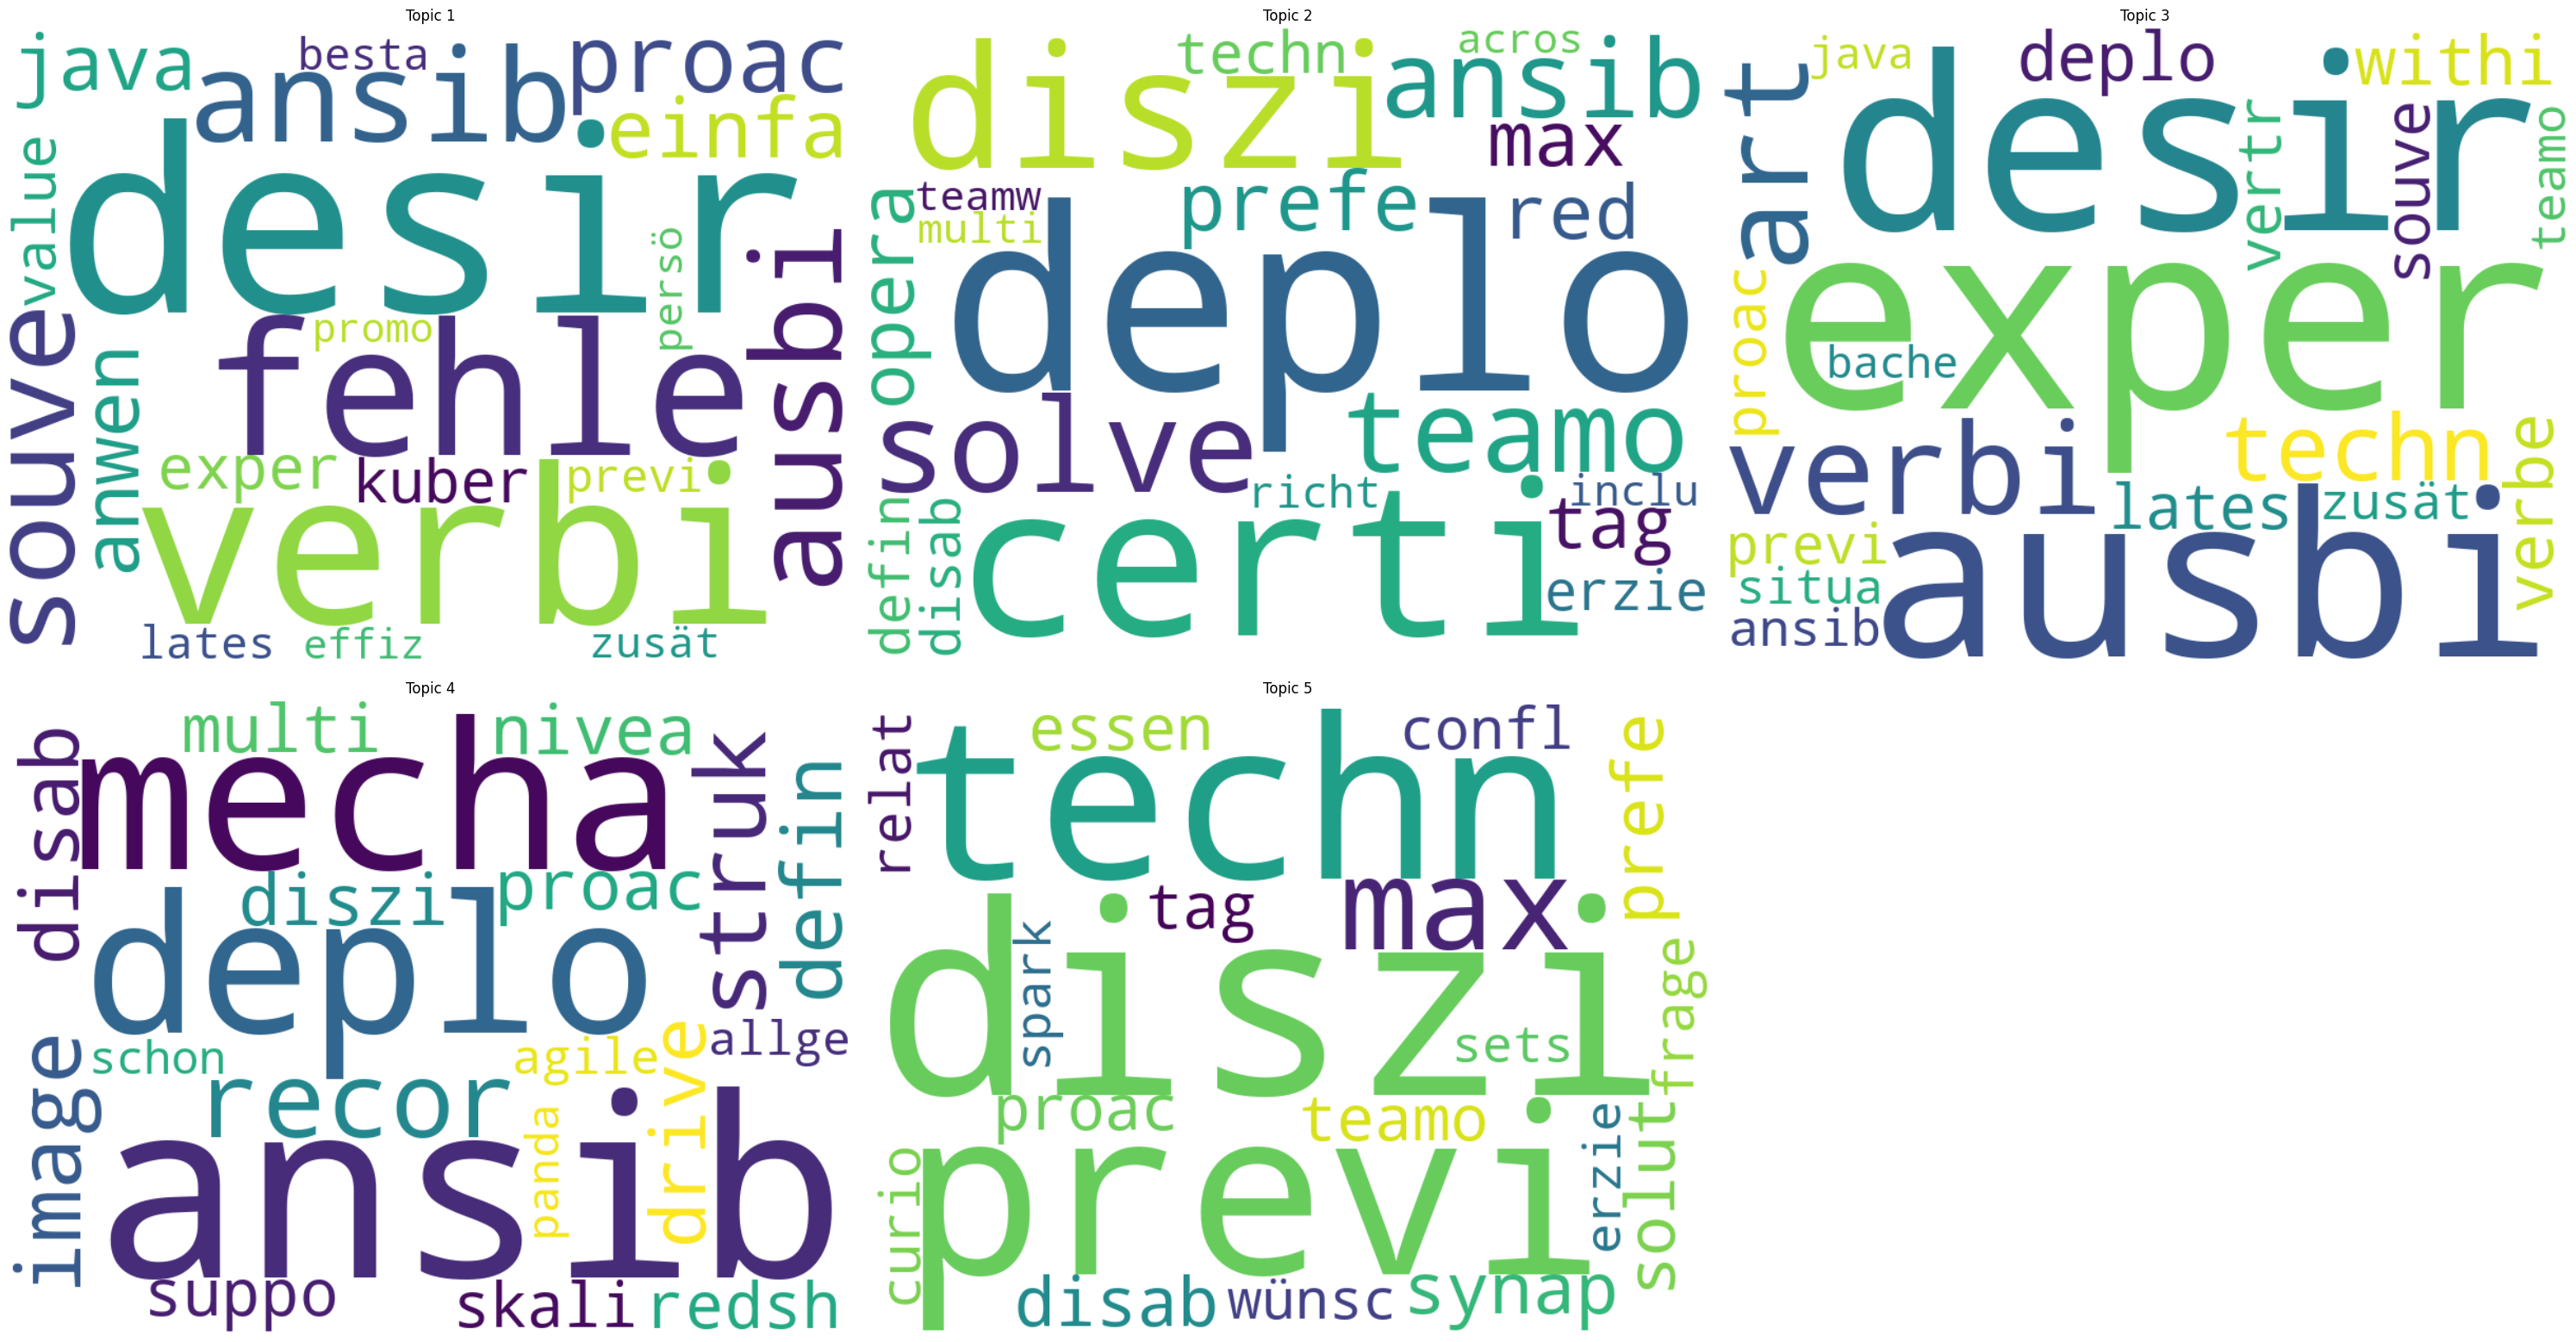

Word Clouds for NMF Topics in Requirements:


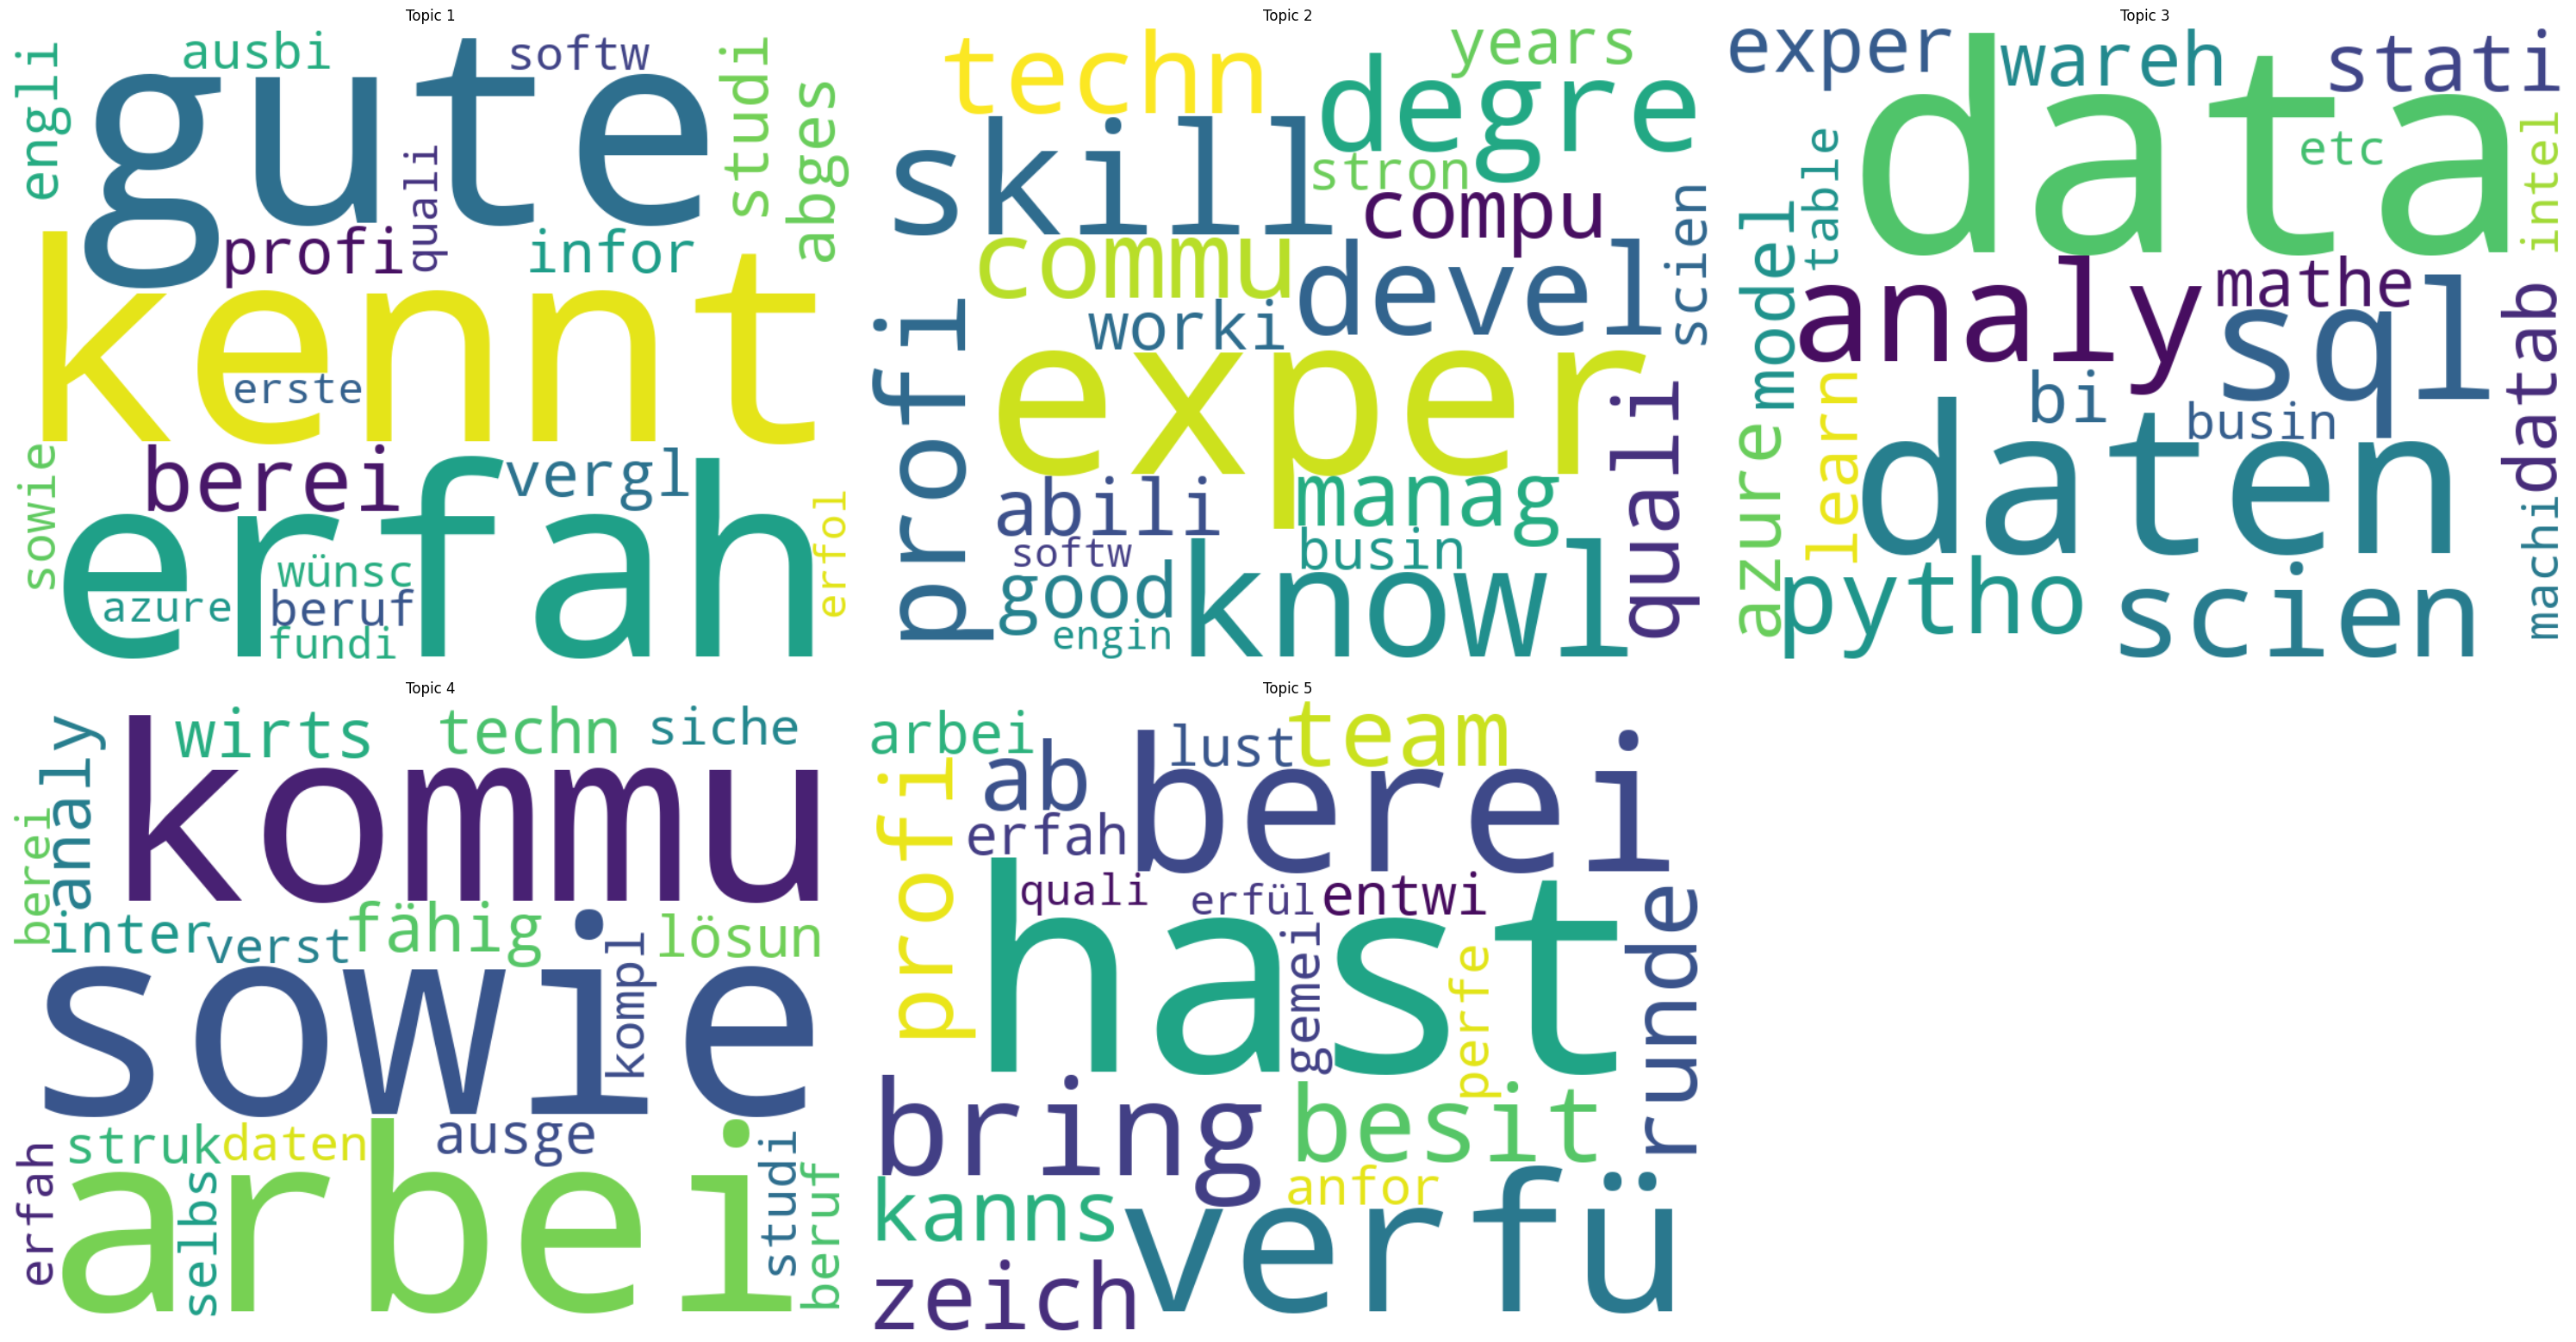

Word Clouds for LDA Topics in Requirements:


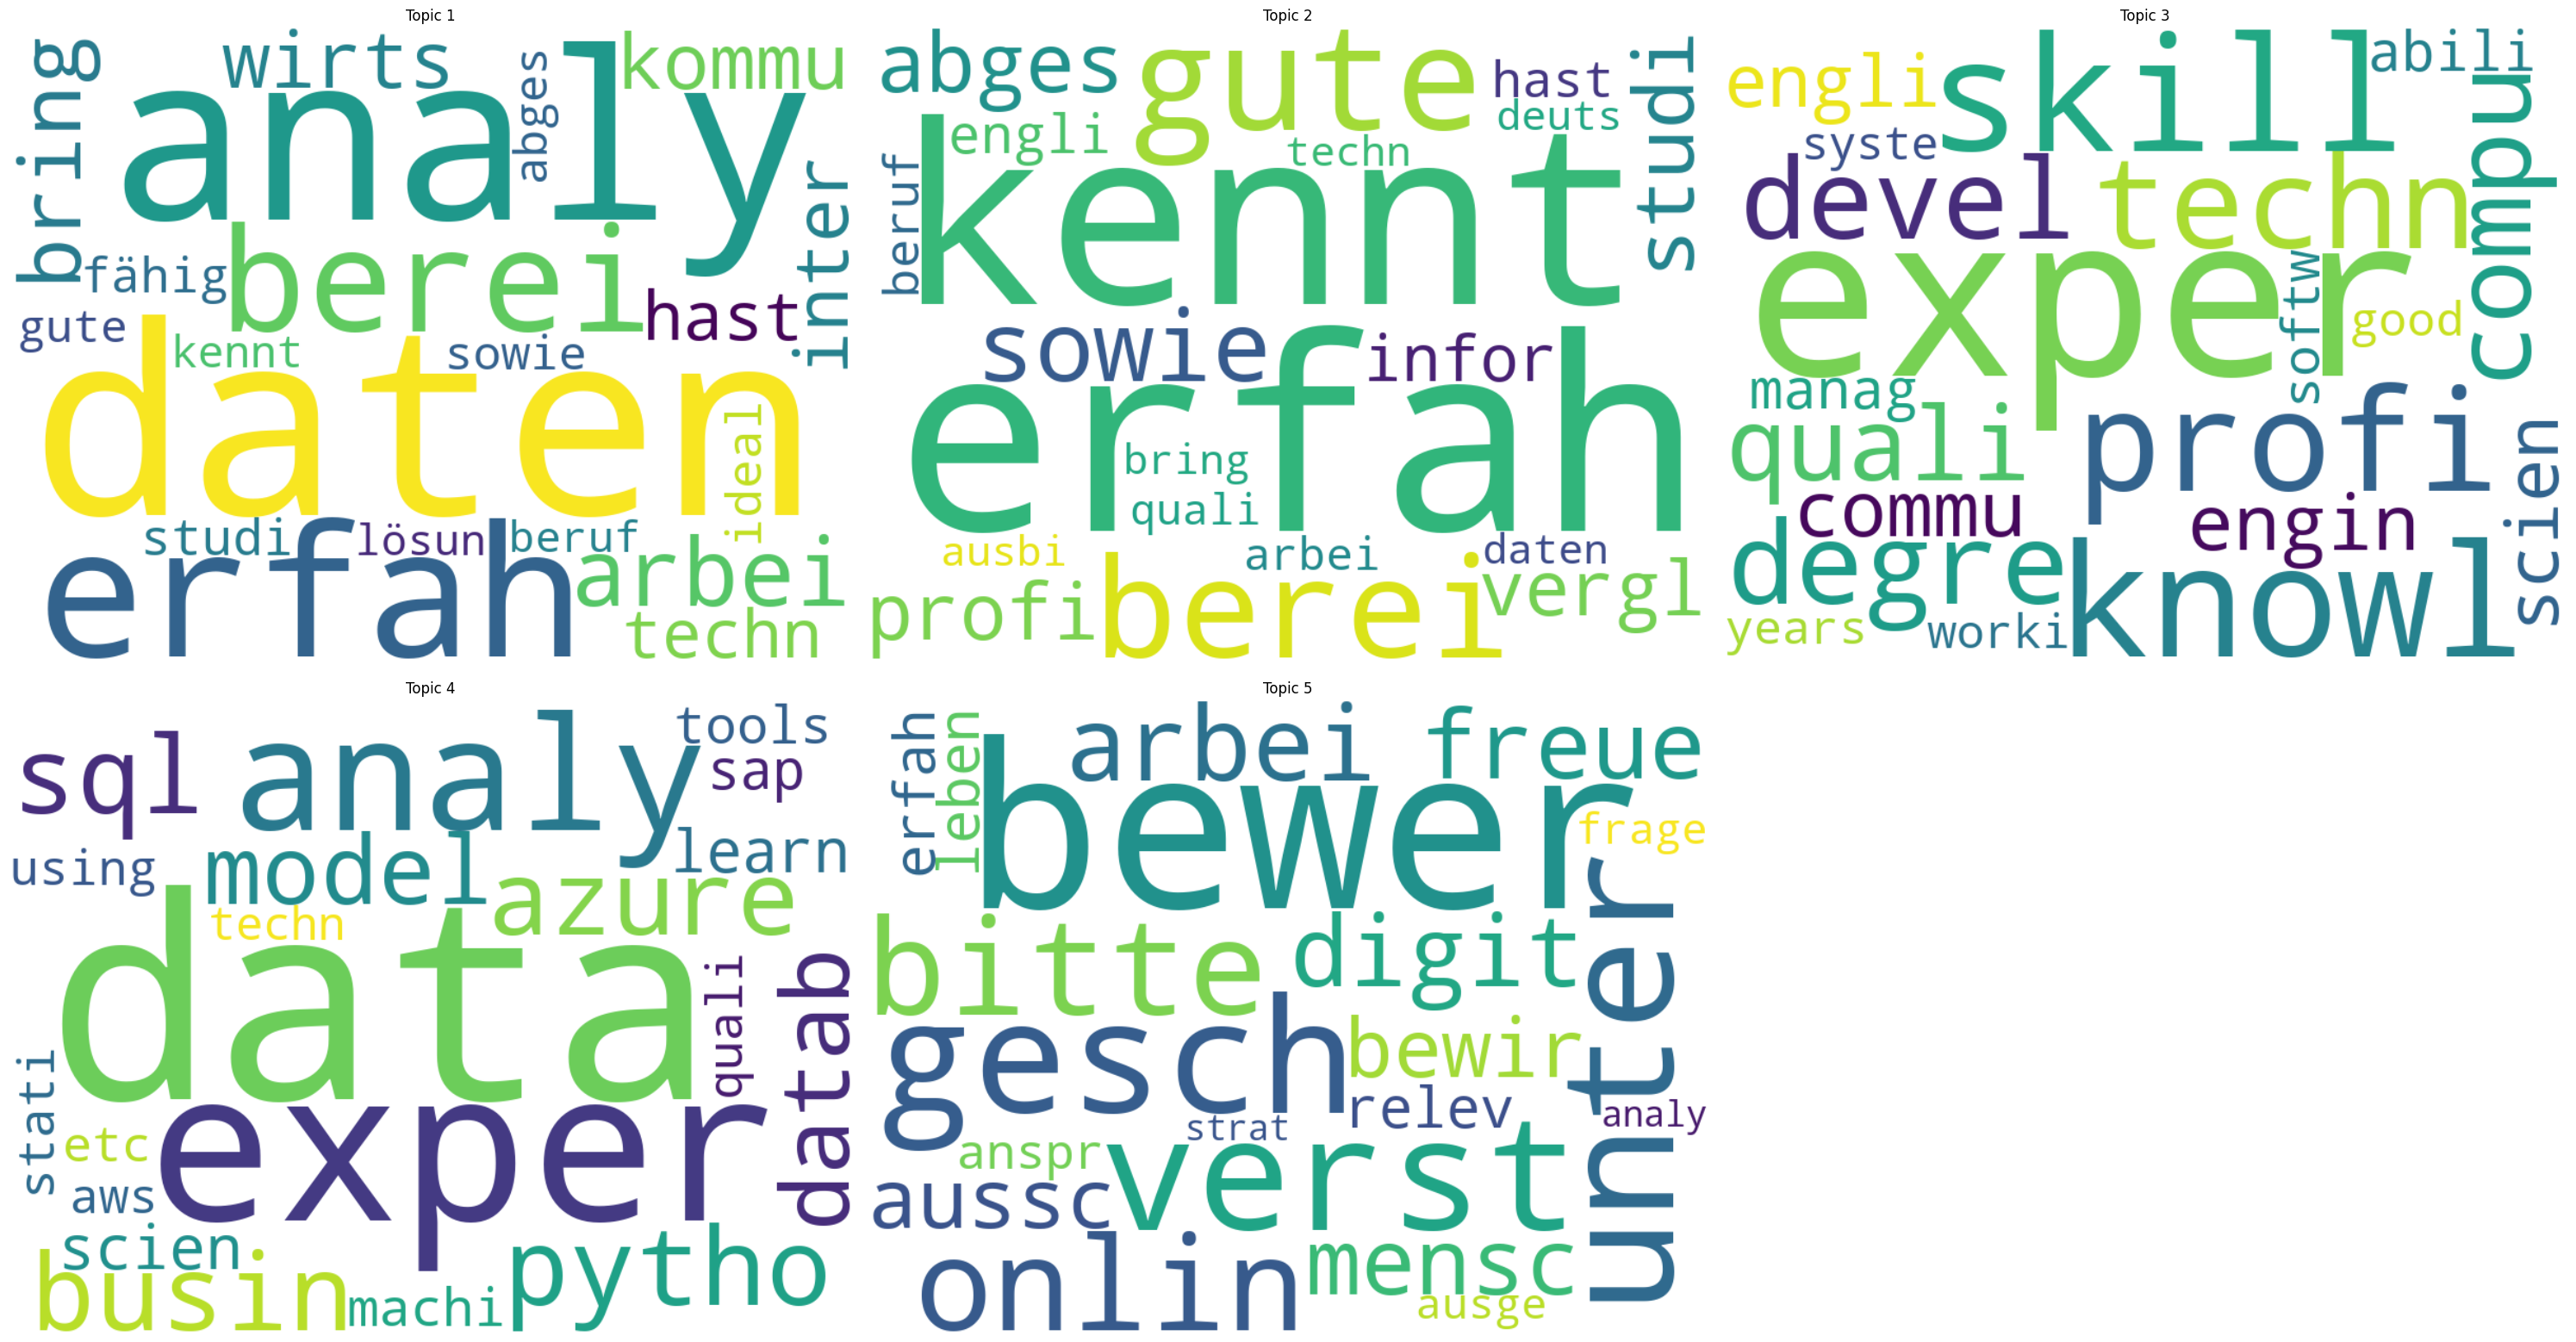

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordclouds(model, feature_names, num_topics):
    plt.figure(figsize=(30, 16))  # Adjust the overall figure size to fit 3 clouds per row
    for topic_idx in range(num_topics):
        # Extract topic weights and sort them to get the most significant terms
        topic = model.components_[topic_idx]
        sorted_topic = sorted(zip(topic, feature_names), reverse=True)
        
        # Generate a word cloud for each topic
        wordcloud = WordCloud(
            width = 800,
            height = 600,
            background_color ='white'
        )
        
        # Prepare word frequencies as a dictionary
        word_frequencies = {word: weight for weight, word in sorted_topic[:20]}  # Taking top 20 words per topic
        wordcloud.generate_from_frequencies(word_frequencies)
        
        # Add a subplot for each word cloud
        ax = plt.subplot(2, 3, topic_idx + 1)  # Assume 5 topics, adjust the grid as necessary
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Topic {topic_idx + 1}')

    plt.tight_layout()
    plt.show()

# Display word clouds for NMF and LDA topics for job descriptions
print("Word Clouds for NMF Topics in Job Descriptions:")
display_wordclouds(nmf_model_job_desc, tfidf_vectorizer.get_feature_names_out(), n_topics)

print("Word Clouds for LDA Topics in Job Descriptions:")
display_wordclouds(lda_model_job_desc, tf_vectorizer.get_feature_names_out(), n_topics)

# Display word clouds for NMF and LDA topics for requirements
print("Word Clouds for NMF Topics in Requirements:")
display_wordclouds(nmf_model_requirements, tfidf_vectorizer.get_feature_names_out(), n_topics)

print("Word Clouds for LDA Topics in Requirements:")
display_wordclouds(lda_model_requirements, tf_vectorizer.get_feature_names_out(), n_topics)



In [23]:
def normalize_city(location):
    location = location.lower()
    # Define main German cities and potential common misspellings or abbreviations
    cities = {
        'berlin': ['berlin', 'berl', 'berln'],
        'munich': ['munich', 'münchen', 'munchen'],
        'hamburg': ['hamburg', 'hamb'],
        'bremen': ['bremen', 'brem'],
        'frankfurt': ['frankfurt', 'frank'],
        'cologne': ['cologne', 'köln', 'koln'],
        'stuttgart': ['stuttgart', 'stuttg'],
        'dresden': ['dresden', 'dresd'],
        'leipzig': ['leipzig', 'leipz'],
        'nuremberg': ['nuremberg', 'nürnberg', 'nurnberg'],
        'hanover': ['hanover', 'hannover'],
        'essen': ['essen'],
        'dortmund': ['dortmund', 'dortm'],
        'dusseldorf': ['dusseldorf', 'düsseldorf', 'dusseld', 'duesseldorf']
        # Add more cities and variations as needed
    }
    
    for standard, variants in cities.items():
        if any(variant in location for variant in variants):
            return standard.capitalize()  # Return the standardized city name with capitalization
    
    return 'Other'  # Return 'Other' if no known city is matched

# Example usage
print(normalize_city("München-West"))
print(normalize_city("Near Berlin center"))

Munich
Berlin


In [26]:
def categorize_job_title(title):
    title = title.lower()
    if 'data engineer' in title:
        return 'Data Engineer'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'data scientist' in title:
        return 'Data Scientist'
    else:
        return 'Other'  # Use 'Other' for titles that do not match the specified roles

# Test the function with some examples
print(categorize_job_title("Senior Data Engineer"))
print(categorize_job_title("Lead Data Analyst"))
print(categorize_job_title("Machine Learning Data Scientist"))


Data Engineer
Data Analyst
Data Scientist


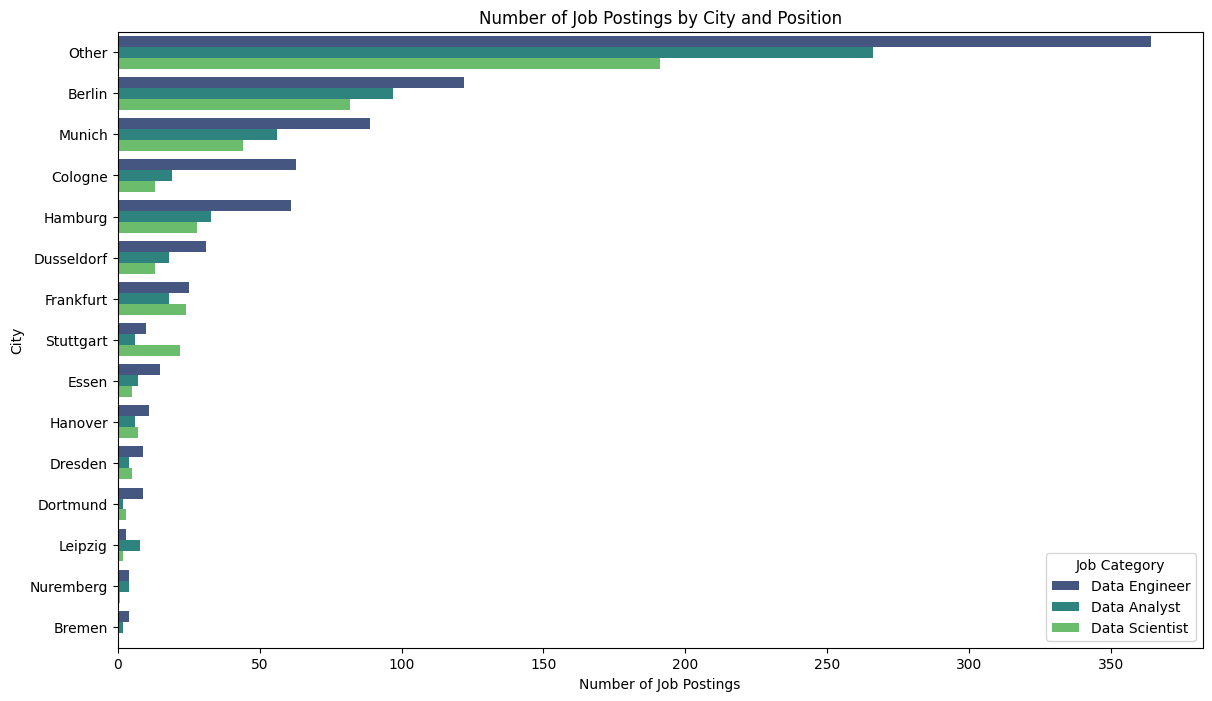

In [27]:
# Apply the categorization function to the 'title' column
data['job_category'] = data['title'].apply(categorize_job_title)


# Apply the normalization function to the location column
data['normalized_location'] = data['location'].apply(normalize_city)

# Aggregate the data by normalized location and job category
job_counts = data.groupby(['normalized_location', 'job_category']).size().reset_index(name='counts')

# Filter out the 'Other' category for clearer visualization of specific roles
filtered_job_counts = job_counts[job_counts['job_category'] != 'Other']

# Sort and get the top entries for visualization
sorted_job_counts = filtered_job_counts.sort_values(by=['counts'], ascending=False)

# Visualizing the data using seaborn for better clarity on the distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.barplot(x='counts', y='normalized_location', hue='job_category', data=sorted_job_counts, palette='viridis')
plt.title('Number of Job Postings by City and Position')
plt.xlabel('Number of Job Postings')
plt.ylabel('City')
plt.legend(title='Job Category')
plt.show()

